# Brief analysis of Wilkin Case

In Wilkin (1996) found the Solution for the Isotropic Wind/Parallel Flow:
\begin{align}
R(\theta) = R_0\csc\theta\sqrt{3(1-\theta\cot\theta)}
\end{align}
Where $R_0 = \sqrt{\frac{\dot{M}^0_w v_w}{4\pi\rho_a v^2_a}}$

The Characteristic radii normalized with $R_0$ are single numerical values:
\begin{align}
\tilde{R}_{90} &= \sqrt{3} \\
\tilde{R}_c &= \frac{5}{3} \\
\tan^2\theta_c & = \frac{1}{3}
\end{align}
So, the behavior of the head is ellipsoidal.

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [185]:
theta = np.linspace(0, np.pi, 10000, endpoint=False)

In [186]:
R = np.sqrt(3*(1 - theta/np.tan(theta))/np.sin(theta)**2)

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [187]:
x = R*np.cos(theta)
y = R*np.sin(theta)

In [188]:
R90 = np.sqrt(3)
Rc = 5./3.

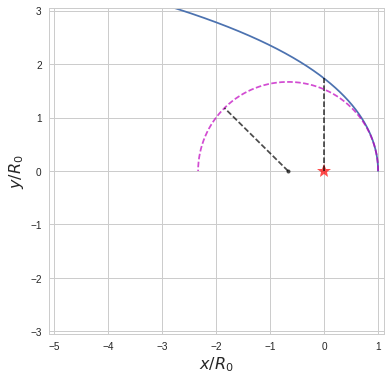

In [189]:
f = plt.figure()
sns.set_style("whitegrid")
ax = f.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.plot([0], [0], "r*", markersize=15, alpha=0.7)
ax.plot([0,0], [0,R90], "k--", alpha=0.7)
ax.plot(Rc*np.cos(theta) + (1-Rc), Rc*np.sin(theta), "m--", alpha=0.7)
plt.plot([1 - Rc], [0], "ko", markersize=4, alpha=0.7)
plt.plot([1 - Rc, Rc*(np.cos(np.radians(135)) - 1) + 1], [0, Rc*np.sin(np.radians(135))], "k--", alpha=0.7)
ax.set_xlim(-5.1, 1.1)
ax.set_ylim(-3.05, 3.05)
ax.set_xlabel(r"$x/R_0$", fontsize = 16)
ax.set_ylabel(r"$y/R_0$", fontsize=16)
f.set_size_inches(6, 6)

In [190]:
Tc = 2*Rc-R90**2
a = Rc/Tc
b = Rc/np.sqrt(Tc)
xe = a*np.cos(theta) + 1-a
ye = b*np.sin(theta)

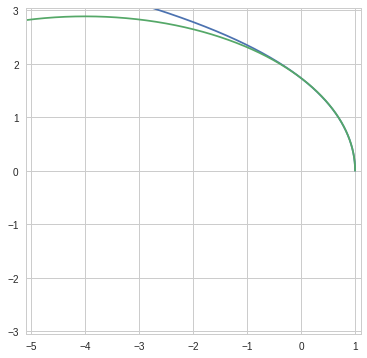

In [191]:
f = plt.figure()
ax2 = f.add_subplot(1, 1, 1)
ax2.plot(x, y)
ax2.plot(xe, ye)
ax2.set_xlim(-5.1, 1.1)
ax2.set_ylim(-3.05, 3.05)
f.set_size_inches(6, 6)

Now check the tail behavior, which most likely will be parabolic or hyperbolic

For $\theta$ near $\pi$ we get that:
\begin{align}
\tilde{R}(\theta) \simeq \sqrt{-3\frac{\theta\cos\theta}{\sin^3\theta}}
\end{align}
We may do a variable change such as $w = \pi - \theta$, to get the following:
\begin{align}
\tilde{R}(w) &\simeq \sqrt{-3(\pi - w)\frac{\cos(\pi - w)}{\sin^3(\pi - w)}} \\
 &= \sqrt{3(\pi - w)\frac{\cos w}{\sin^3 w}}
\end{align}


Since we are assuming $w$ is small, we may do a Taylor expansion for $\tilde{R}$:
\begin{align}
\cos w &\simeq 1 - \frac{w^2}{2} \\
\sin^{-3}w &\simeq w^{-3}\left(1+ \frac{1}{2}w^2\right)\\
\implies \frac{\cos w}{\sin^3 w} & \simeq w^{-3}\left(1 - \frac{w^4}{15}\right) \simeq w^{-3}
\end{align}
Still need to check the complete procedure since I got help from Wolfram mathematica for the expansions.

\begin{align}
\frac{\tilde{R}^2}{3} \simeq \frac{(\pi-w)}{w^3}
\end{align}

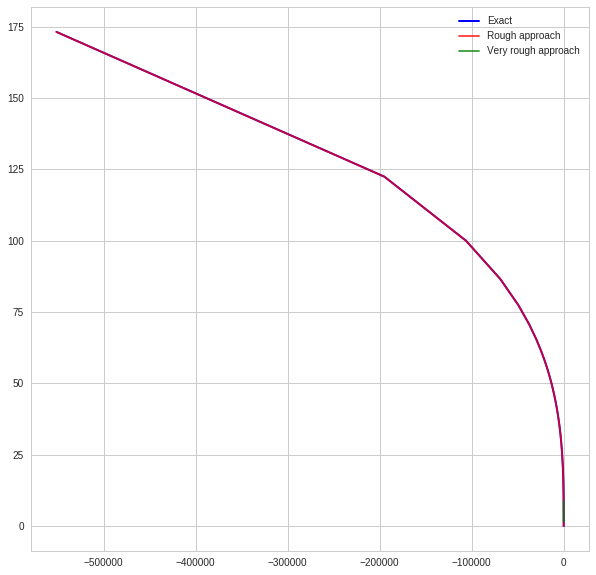

In [192]:
w = np.pi - theta
R_as = np.sqrt(3*(np.pi-w)/w**3)
x_as,y_as = R_as*np.cos(theta), R_as*np.sin(theta)
f = plt.figure()
ax3 = f.add_subplot(1, 1, 1)
ax3.plot(x, y, "b", alpha=1, lw=2, label="Exact")
ax3.plot(x_as, y_as, "r", label="Rough approach", alpha=0.8)
x_f = np.linspace(-70, 1)
y_f = (3*np.pi*np.abs(x_f))**(1./3)
ax3.plot(x_f, y_f, "g", label="Very rough approach", alpha=0.8)
ax3.legend()
#ax3.set_xlim(-5.1,1.1)
#ax3.set_ylim(-3.05,3.05)
f.set_size_inches(10, 10)

## Another approximation: Simply graph R vs $\theta$ and check if there are some asymptotic value

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


(0, 185)

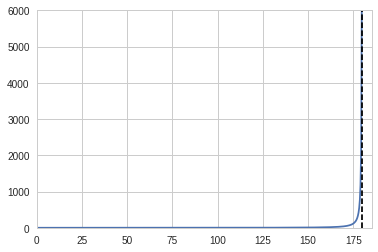

In [193]:
t = np.linspace(0, np.pi, 500, endpoint=False)
r = np.sqrt(3*(1-t/np.tan(t))/np.sin(t)**2)
plt.plot(np.degrees(t), r)
plt.plot([180, 180],[0, 6500], "k--")
plt.ylim(0, 6000)
plt.xlim(0, 185)

Looks like the asymptotic value is $\pi$, which indicates the tail behavior is not hyperbolic

# Check $\sin\phi_t$ for a set of inclinations

The parabolic approximation gives a simple and useful approximations in the range $90^\circ < \theta < 150^\circ$, but fails outside that range. Then, is neccesary to check if is posible to find bow shocks at so high inclinations that we may see a region outside our "range of confidence" $(\theta < 150^\circ)$. If the answer is "yes", then we need to find another way to fit the tail which would cover a longer range. Otherwise, our current solution is accurate enough to cover all the needed range. 

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


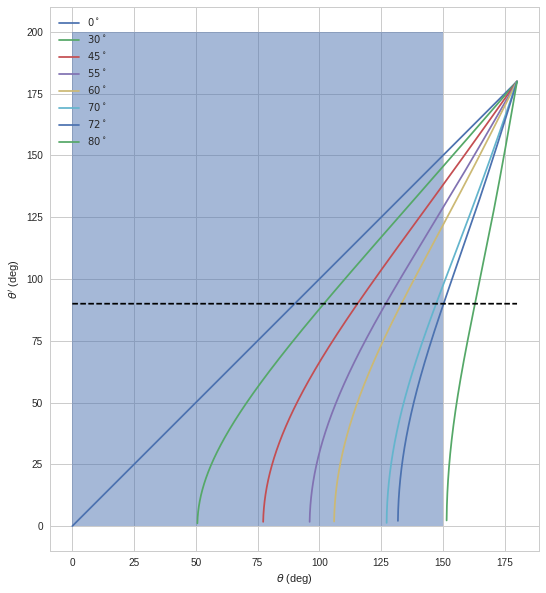

In [214]:
plt.clf()
tan_alpha = np.diff(y)/np.diff(x)
inc = [0, 30, 45, 55, 60, 70, 72, 80]
f = plt.figure()
#ax1 = f.add_subplot(2, 1, 1)
ax2 = f.add_subplot(1, 1, 1, aspect=1)
#ax3 = f.add_subplot(3, 1, 3, aspect=1)
for i in inc:
    sin_phit = np.tan(np.radians(i))*tan_alpha
#    ax1.plot(np.degrees(theta[:-1]), sin_phit, label=r"${}^\circ$".format(i))
    xtp = R[:-1]*((np.cos(theta[:-1])*np.cos(np.radians(i))) - np.sin(theta[:-1])*sin_phit*np.sin(np.radians(i)))
    ytp = R[:-1]*np.sin(theta[:-1])*np.sqrt(1 - sin_phit**2)
    thetap = np.arctan2(ytp, xtp)
    Rp = np.hypot(xtp, ytp)
    ax2.plot(np.degrees(theta[:-1]), np.degrees(thetap), label=r"${}^\circ$".format(i))
#    ax3.plot(xtp, ytp)
#ax1.fill_between(np.degrees(theta), 1, -1, alpha=0.5)
ax2.legend()
#ax1.set_ylim(-1.5, 1.5)
ax2.plot(np.degrees(theta), 90*np.ones_like(theta), "k--")
ax2.fill_between([0, 150], 0, 200, alpha=0.5)
ax2.set_xlabel(r"$\theta$ (deg)")
ax2.set_ylabel(r"$\theta'$ (deg)")
#ax3.set_xlim(-20,1)
#ax3.set_ylim(0, 10)
f.set_size_inches(10, 10)

Diagnostic: All the $\theta'_{90}$ until $i < 72^{\circ}$, correspond to the zone where the parabolic fit is still reliable. Otherwise, a better fit to the tail is needed.